In [255]:
import time
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno

from sklearn.datasets import load_digits # (1797, 8 * 8)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.decomposition import PCA, KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [81]:
# return_X_y=True
digits = load_digits()
data = digits.data
labels = digits.target
labels.shape

(1797,)

In [82]:
data.shape

(1797, 64)

In [83]:
data[:3, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [84]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Missing Value

In [85]:
pd.DataFrame(data).isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

## imshow

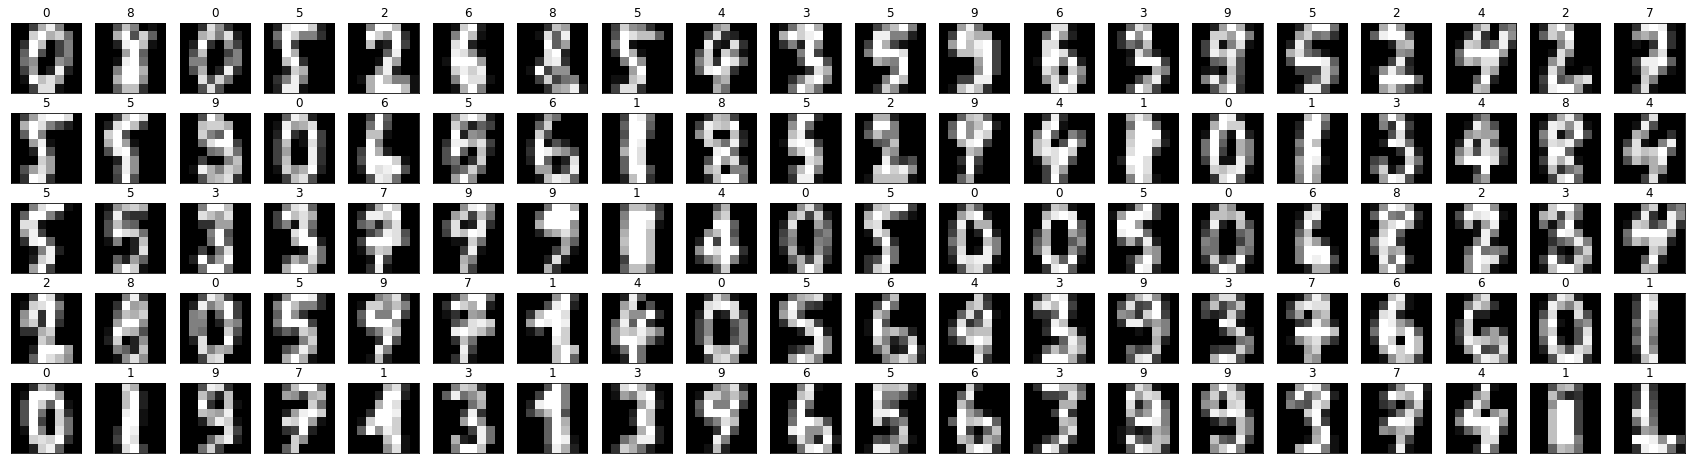

In [86]:
fig, axes = plt.subplots(5, 20, figsize=(30, 8))
# fig.subplots_adjust(hspace=0.01, wspace=0.01)

idxs = np.random.randint(low=0, high=1796, size=100)
for i , ax in zip(idxs, axes.flat):
  ax.imshow(data[i].reshape(8, 8), cmap='gray')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(labels[i])

## PCA

### Elobw

In [87]:
pca1 = PCA()
PC_digits1 = pca1.fit_transform(data)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

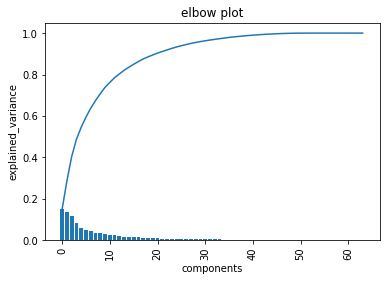

In [109]:
plt.bar(np.arange(64), pca1.explained_variance_ratio_)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

In [122]:
total_var = np.cumsum(pca1.explained_variance_ratio_) * 100

for i in [0, 1, 2, 3, 4, 9, 19, 29, 39]:
  print("pca1 {:2d}, explained var: {:.2f}".format(i + 1, total_var[i]))

pca1  1, explained var: 14.89
pca1  2, explained var: 28.51
pca1  3, explained var: 40.30
pca1  4, explained var: 48.71
pca1  5, explained var: 54.50
pca1 10, explained var: 73.82
pca1 20, explained var: 89.43
pca1 30, explained var: 95.91
pca1 40, explained var: 98.82


In [88]:
PC_digits1.shape

(1797, 64)

In [89]:
PC_digits1.size, PC_digits1.nbytes, PC_digits1.itemsize

(115008, 920064, 8)

In [90]:
data.size, data.nbytes, data.itemsize

(115008, 920064, 8)

### PCA(n_components=2)

In [94]:
pca2 = PCA(n_components=2)
PC_digits2 = pca2.fit_transform(data)

In [95]:
PC_digits2.shape

(1797, 2)

In [96]:
PC_digits2.size, PC_digits2.nbytes, PC_digits2.itemsize

(3594, 28752, 8)

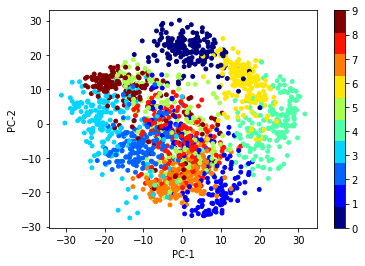

In [101]:
plt.scatter(PC_digits2[:, 0], PC_digits2[:, 1], s=15, c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.xlabel('PC-1'), plt.ylabel('PC-2')

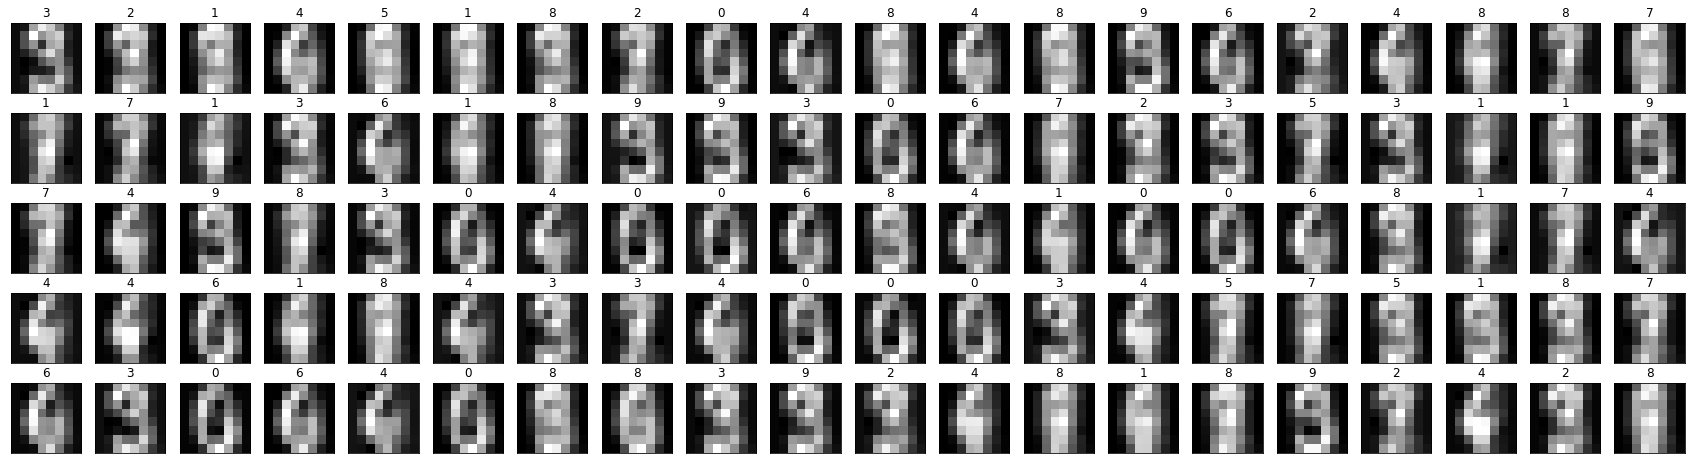

In [123]:
fig, axes = plt.subplots(5, 20, figsize=(30, 8))
# fig.subplots_adjust(hspace=0.01, wspace=0.01)

samples = pca2.inverse_transform(PC_digits2)

idxs = np.random.randint(low=0, high=1796, size=100)
for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(8, 8), cmap='gray')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(labels[i])

### PCA(n_components=3)

In [132]:
pca3 = PCA(n_components=3)
PC_digits3 = pca3.fit_transform(data)

[]

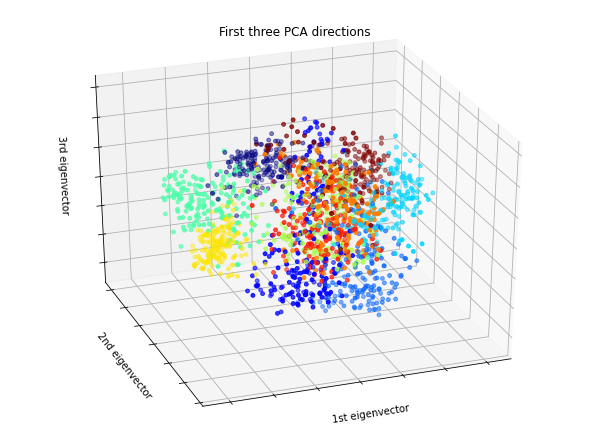

In [133]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(
    PC_digits3[:, 0],
    PC_digits3[:, 1],
    PC_digits3[:, 2],
    c=labels,
    cmap=plt.cm.get_cmap('jet', 10),
    s=15,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

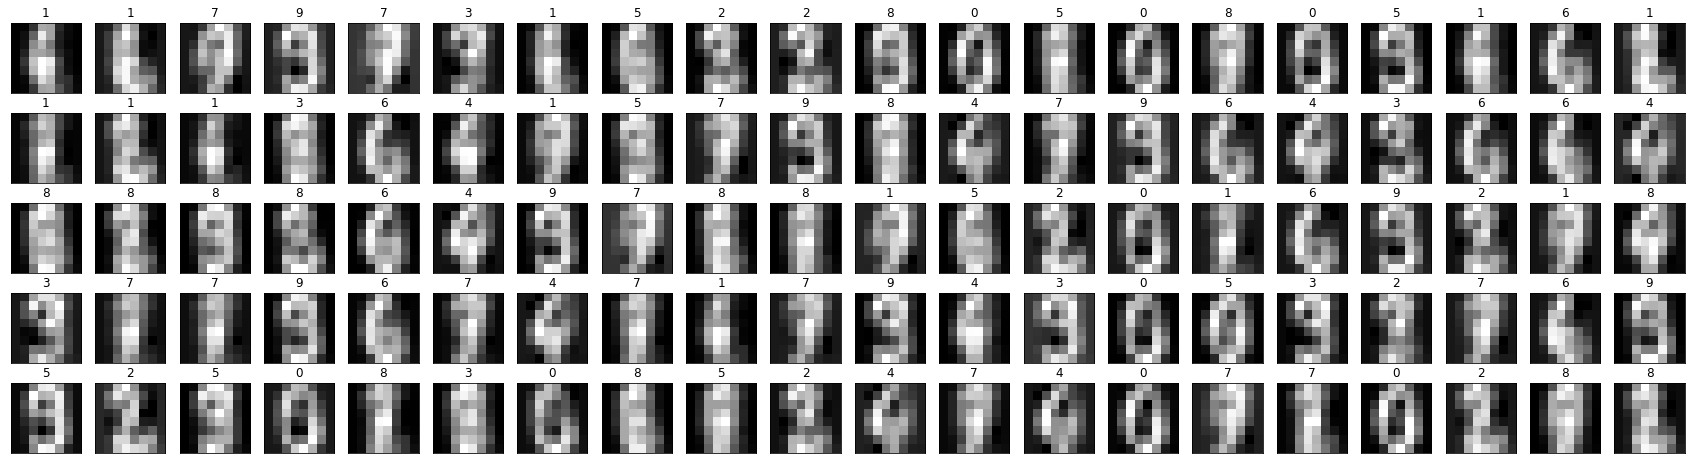

In [134]:
fig, axes = plt.subplots(5, 20, figsize=(30, 8))
# fig.subplots_adjust(hspace=0.01, wspace=0.01)

samples = pca3.inverse_transform(PC_digits3)

idxs = np.random.randint(low=0, high=1796, size=100)
for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(8, 8), cmap='gray')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(labels[i])

### PCA(n_components=40)

In [135]:
pca40 = PCA(n_components=40)
PC_digits40 = pca40.fit_transform(data)

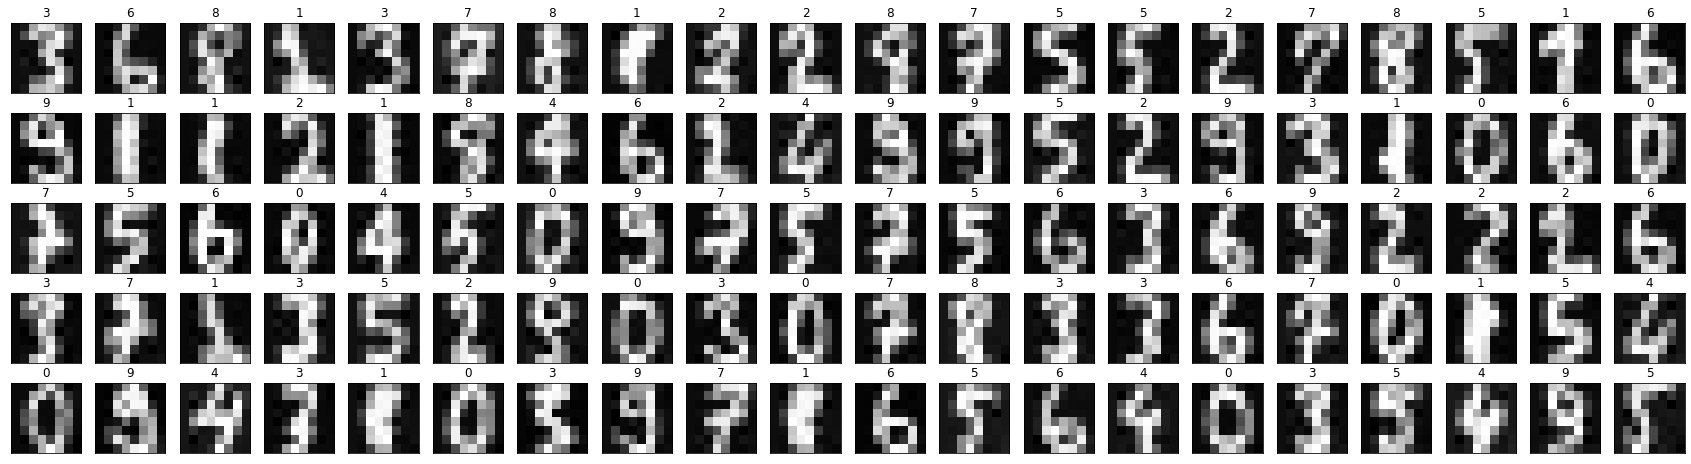

In [137]:
fig, axes = plt.subplots(5, 20, figsize=(30, 8))
# fig.subplots_adjust(hspace=0.01, wspace=0.01)

samples = pca40.inverse_transform(PC_digits40)

idxs = np.random.randint(low=0, high=1796, size=100)
for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(8, 8), cmap='gray')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(labels[i])

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    train_size=4/5,
                                                    random_state=42)

## SVC

In [253]:
steps = Pipeline([
    ('pca', PCA()),
    ('svc', SVC(kernel='rbf'))
])

params = {
    'pca__n_components': [35, 36, 38, 39, 40],
    'svc__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'svc__gamma': [0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

search_svc = GridSearchCV(steps, params, verbose=10)

In [254]:
t1 = time.time()
search_svc.fit(X_train, y_train)
t2 = time.time()

Fitting 5 folds for each of 495 candidates, totalling 2475 fits
[CV 1/5; 1/495] START pca__n_components=35, svc__C=0.1, svc__gamma=0.01.........
[CV 1/5; 1/495] END pca__n_components=35, svc__C=0.1, svc__gamma=0.01;, score=0.108 total time=   0.3s
[CV 2/5; 1/495] START pca__n_components=35, svc__C=0.1, svc__gamma=0.01.........
[CV 2/5; 1/495] END pca__n_components=35, svc__C=0.1, svc__gamma=0.01;, score=0.108 total time=   0.3s
[CV 3/5; 1/495] START pca__n_components=35, svc__C=0.1, svc__gamma=0.01.........
[CV 3/5; 1/495] END pca__n_components=35, svc__C=0.1, svc__gamma=0.01;, score=0.108 total time=   0.3s
[CV 4/5; 1/495] START pca__n_components=35, svc__C=0.1, svc__gamma=0.01.........
[CV 4/5; 1/495] END pca__n_components=35, svc__C=0.1, svc__gamma=0.01;, score=0.108 total time=   0.3s
[CV 5/5; 1/495] START pca__n_components=35, svc__C=0.1, svc__gamma=0.01.........
[CV 5/5; 1/495] END pca__n_components=35, svc__C=0.1, svc__gamma=0.01;, score=0.105 total time=   0.3s
[CV 1/5; 2/495] 

In [256]:
print(f'executaion time: {(t2-t1)/60}')

executaion time: 13.272713581720987


In [257]:
search_svc.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=35)), ('svc', SVC(C=10, gamma=0.01))])

In [258]:
y_preds = search_svc.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       1.00      0.89      0.94        28
           2       1.00      0.82      0.90        33
           3       1.00      0.76      0.87        34
           4       1.00      0.87      0.93        46
           5       1.00      0.83      0.91        47
           6       1.00      0.89      0.94        35
           7       1.00      0.85      0.92        34
           8       0.33      1.00      0.50        30
           9       1.00      0.80      0.89        40

    accuracy                           0.83       360
   macro avg       0.93      0.83      0.85       360
weighted avg       0.94      0.83      0.86       360



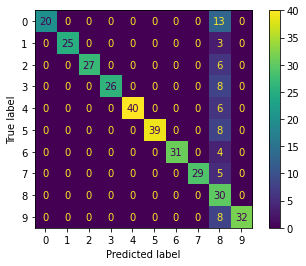

In [259]:
ConfusionMatrixDisplay.from_estimator(search_svc, X_test, y_test)

61


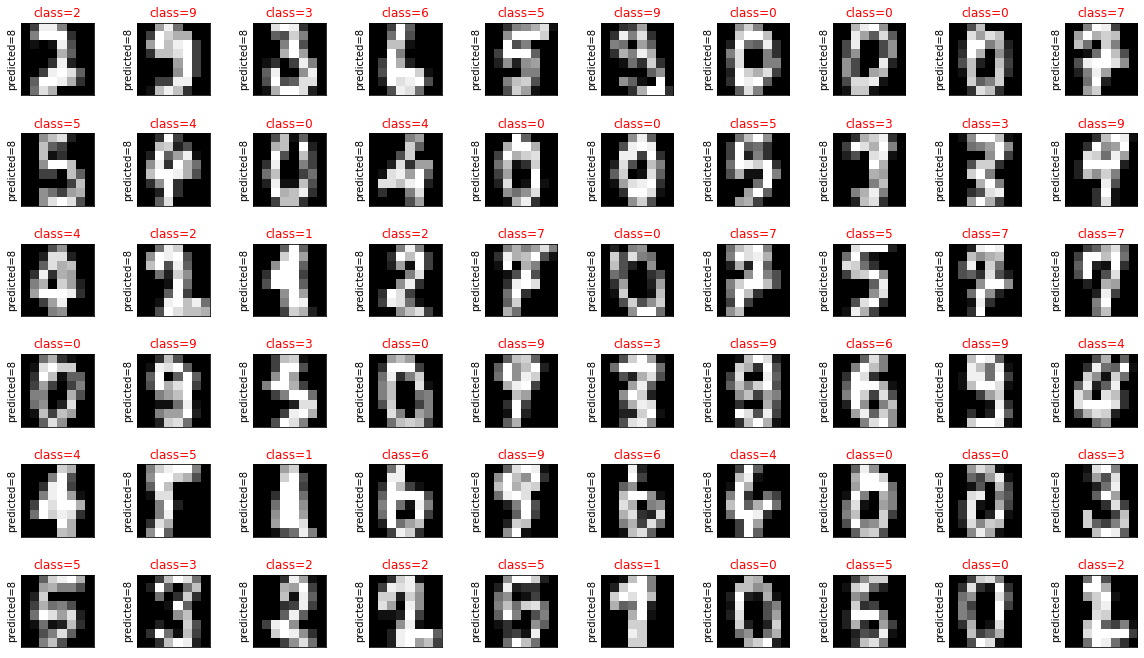

In [264]:
fig, axes = plt.subplots(6, 10, 
                         figsize=(20, 12),
                         subplot_kw={
                           'xticks': [],
                           'yticks': []
                        },
                         gridspec_kw=dict(hspace=0.1, wspace=0.6))

samples = X_test
idxs = np.ndarray.flatten(np.argwhere(y_test != y_preds))
print(len(idxs))

for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(8, 8), cmap='gray')
  ax.set_title(f'class={y_test[i]}', fontdict={'color': 'red'})
  ax.set_ylabel(f'predicted={y_preds[i]}')

## Logistic Regression

In [216]:
steps = Pipeline([
    ('pca', PCA()),
    ('log_reg', LogisticRegression(max_iter=10000))
])

params = {
    'pca__n_components': [35, 36, 38, 39, 40],
    'log_reg__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
}

search_log_reg = GridSearchCV(steps, params, verbose=10)

In [217]:
t1 = time.time()
search_log_reg.fit(X_train, y_train)
t2 = time.time()

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 1/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.969 total time=   1.6s
[CV 2/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 2/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.955 total time=   1.6s
[CV 3/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 3/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.951 total time=   0.7s
[CV 4/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 4/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.972 total time=   0.6s
[CV 5/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 5/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.923 total time=   0.8s
[CV 1/5; 2/55] START log_reg__C=0.1, pca__n_components=36.......................
[CV 1/5

In [218]:
print(f'executaion time: {(t2-t1)/60}')

executaion time: 4.64582454363505


In [219]:
search_log_reg.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('log_reg', LogisticRegression(C=0.1, max_iter=10000))])

In [224]:
y_preds = search_log_reg.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



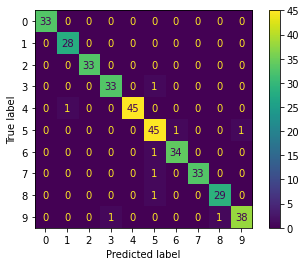

In [223]:
ConfusionMatrixDisplay.from_estimator(search_log_reg, X_test, y_test)

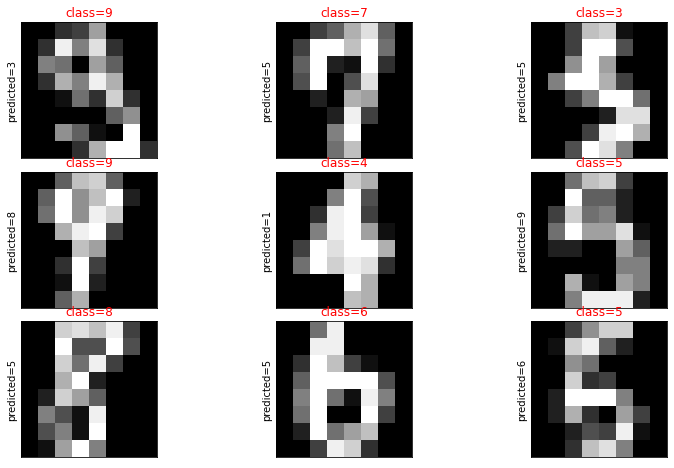

In [251]:
fig, axes = plt.subplots(3, 3, 
                         figsize=(12, 8),
                         subplot_kw={
                           'xticks': [],
                           'yticks': []
                        },
                         gridspec_kw=dict(hspace=0.1, wspace=0.6))

samples = X_test
idxs = np.ndarray.flatten(np.argwhere(y_test != y_preds))

for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(8, 8), cmap='gray')
  ax.set_title(f'class={y_test[i]}', fontdict={'color': 'green' if y_test[i] == y_preds[i] else 'red'})
  ax.set_ylabel(f'predicted={y_preds[i]}')

## Naive Bayes

In [ ]:
steps = Pipeline([
    ('pca', PCA()),
    ('nb', GaussianNB(max_iter=10000))
])

params = {
    'pca__n_components': [35, 36, 38, 39, 40],
}

search_nb = GridSearchCV(steps, params, verbose=10)

In [ ]:
t1 = time.time()
search_nb.fit(X_train, y_train)
t2 = time.time()

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 1/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.969 total time=   1.6s
[CV 2/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 2/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.955 total time=   1.6s
[CV 3/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 3/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.951 total time=   0.7s
[CV 4/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 4/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.972 total time=   0.6s
[CV 5/5; 1/55] START log_reg__C=0.1, pca__n_components=35.......................
[CV 5/5; 1/55] END log_reg__C=0.1, pca__n_components=35;, score=0.923 total time=   0.8s
[CV 1/5; 2/55] START log_reg__C=0.1, pca__n_components=36.......................
[CV 1/5

In [ ]:
print(f'executaion time: {(t2-t1)/60}')

executaion time: 4.64582454363505


In [ ]:
search_nb.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('log_reg', LogisticRegression(C=0.1, max_iter=10000))])

In [ ]:
y_preds = search_nb.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



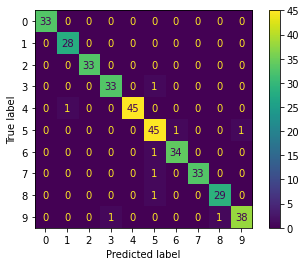

In [ ]:
ConfusionMatrixDisplay.from_estimator(search_nb, X_test, y_test)

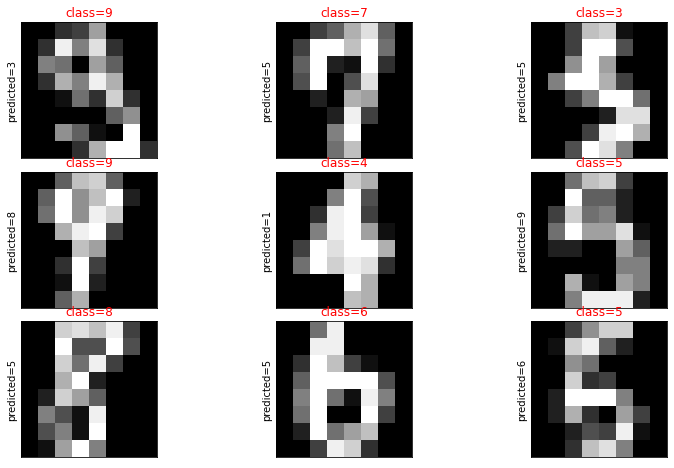

In [ ]:
fig, axes = plt.subplots(3, 3, 
                         figsize=(12, 8),
                         subplot_kw={
                           'xticks': [],
                           'yticks': []
                        },
                         gridspec_kw=dict(hspace=0.1, wspace=0.6))

samples = X_test
idxs = np.ndarray.flatten(np.argwhere(y_test != y_preds))

for i , ax in zip(idxs, axes.flat):
  ax.imshow(samples[i].reshape(8, 8), cmap='gray')
  ax.set_title(f'class={y_test[i]}', fontdict={'color': 'green' if y_test[i] == y_preds[i] else 'red'})
  ax.set_ylabel(f'predicted={y_preds[i]}')